In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('dataa.csv')

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Column Types

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
- **Mixed** - Name, Ticket, Cabin

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [13]:
df['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [14]:
df['Age'].shape

(418,)

<Axes: ylabel='Frequency'>

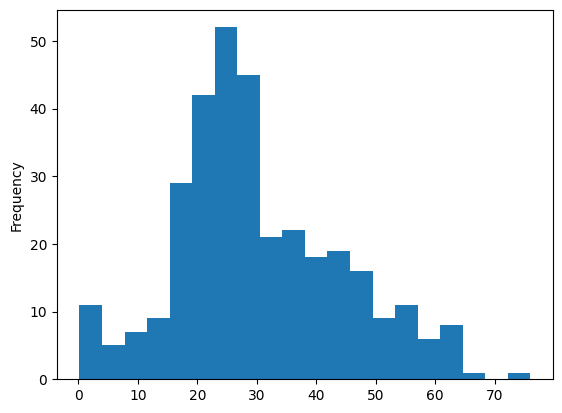

In [15]:
df['Age'].plot(kind = 'hist',bins = 20)

In [16]:
df['Age'].skew()

np.float64(0.4573612871503845)

<Axes: ylabel='Density'>

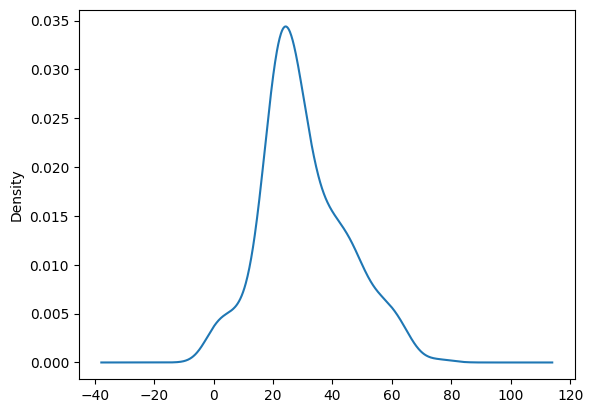

In [17]:
df['Age'].plot(kind = 'kde')

<Axes: >

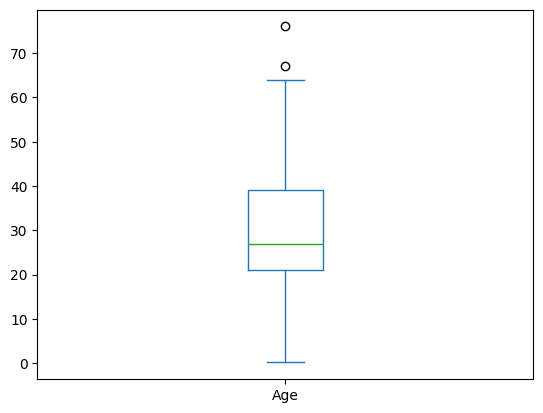

In [18]:
df['Age'].plot(kind = 'box')

In [19]:
df[df['Age'] >65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [20]:
df['Age'].isnull().sum()/len(df['Age'])*100

np.float64(20.574162679425836)

In [21]:
df['Fare'].shape

(418,)

In [22]:
df['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [23]:
df['Fare'].skew()

np.float64(3.6872133081121405)

<Axes: >

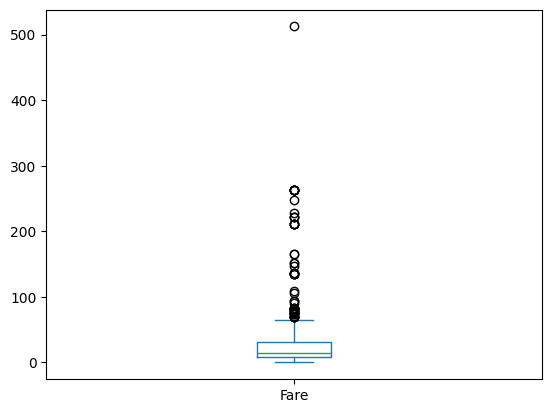

In [24]:
df['Fare'].plot(kind='box')

<Axes: ylabel='Density'>

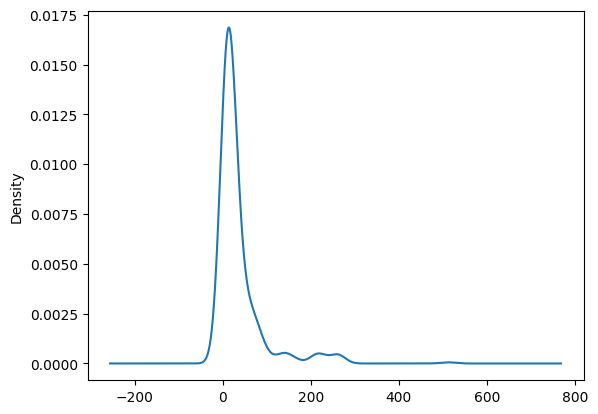

In [25]:
df['Fare'].plot(kind='kde')

In [26]:
df[df['Fare']>250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
53,945,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S
59,951,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C
64,956,0,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
142,1034,0,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
343,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C
375,1267,1,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C


In [27]:
df['Fare'].isnull().sum()

np.int64(1)

#### Conclusions Derived from Univariate analysis on Numerical columns
- The data is highly(positively) skewed
-  Fare col actually contains the group fare and not the individual fare(This migth be and issue)
-  We need to create a new col called individual fare 
-  Age is normally(almost) distributed
-  20% of the values are missing
-  There are some outliers

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Categorical - Survived, Pclass, Sex, SibSp, Parch,Embarked

<Axes: xlabel='Pclass'>

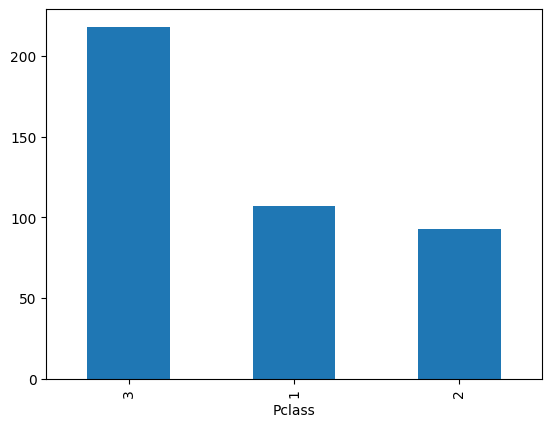

In [29]:
df['Pclass'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

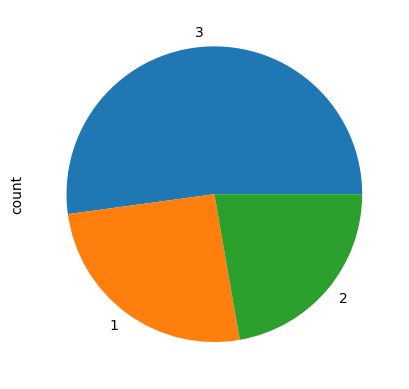

In [30]:
df['Pclass'].value_counts().plot(kind = 'pie')

In [31]:
df['Pclass'].isnull().sum()

np.int64(0)

In [32]:
df['Pclass'].unique()

array([3, 2, 1])

<Axes: xlabel='Survived'>

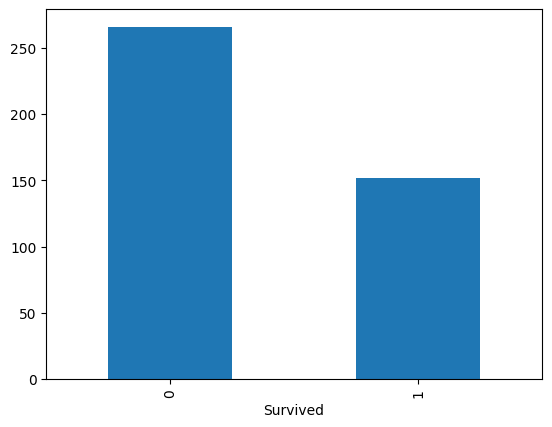

In [33]:
df['Survived'].value_counts().plot(kind = 'bar')

In [34]:
df['Survived'].isnull().sum()

np.int64(0)

In [35]:
df['Sex'].isnull().sum()

np.int64(0)

In [36]:
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

<Axes: xlabel='Sex'>

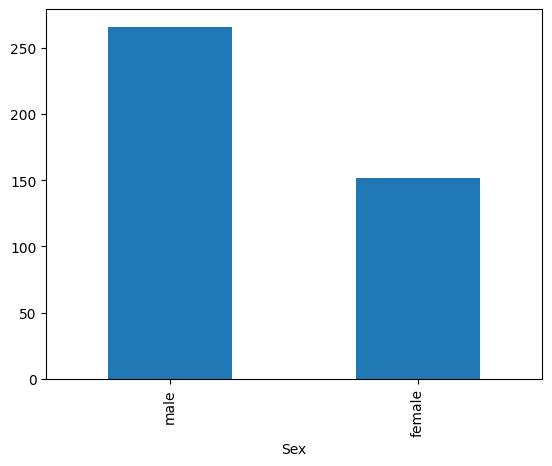

In [37]:
df['Sex'].value_counts().plot(kind = 'bar')

### Bivariate analysis
   **- Numerical-Numerical**
   **- Numerical-Categorial**
   **- Categorial-Categorial**

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
df.corr(method = 'pearson')

ValueError: could not convert string to float: 'Kelly, Mr. James'

In [ ]:
pd.crosstab(df['Survived'],df['Sex'],normalize = 'columns')

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


In [ ]:
pd.crosstab(df['Survived'],df['Pclass'],normalize = 'columns')

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


In [ ]:
pd.crosstab(df['Survived'],df['Embarked'],normalize = 'columns')

Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.663043
1,0.553571,0.38961,0.336957


In [ ]:
pd.crosstab(df['Sex'],df['Embarked'],normalize = 'columns')

Embarked,C,Q,S
Sex,,,
female,0.434524,0.467532,0.315217
male,0.565476,0.532468,0.684783


In [ ]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize = 'columns')

Embarked,C,Q,S
Pclass,,,
1,0.505952,0.025974,0.197205
2,0.101190,0.038961,0.254658
3,0.392857,0.935065,0.548137


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


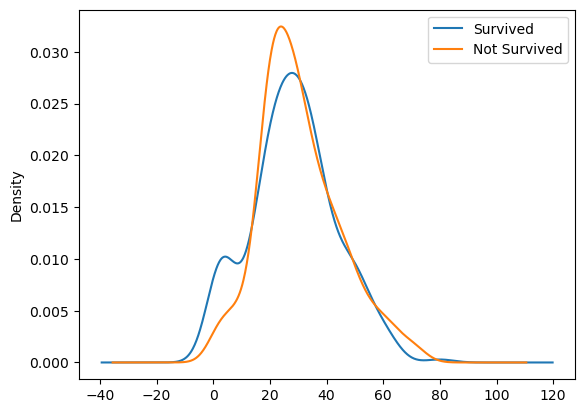

In [ ]:
df[df['Survived']==1]['Age'].plot(kind='kde',label = 'Survived')
df[df['Survived']==0]['Age'].plot(kind='kde',label = 'Not Survived')
plt.legend()
plt.show()